# **Libraries**





In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import classification_report,accuracy_score

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

import warnings
warnings.filterwarnings("ignore")

**Copying Kaggle API key file to the correct directory**

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


**Downloading dataset 'cards-image-datasetclassification' using Kaggle CLI**

In [3]:
!kaggle datasets download -d gpiosenka/cards-image-datasetclassification

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification
License(s): CC0-1.0
 99% 382M/385M [00:19<00:00, 23.1MB/s]
100% 385M/385M [00:19<00:00, 20.4MB/s]


**Extracting the contents of 'cards-image-datasetclassification.zip' to the '/content' directory**

In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cards-image-datasetclassification.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

**Define batch size and image dimensions for the dataset**

In [5]:
batch_size = 32
img_height = 60
img_width = 60

**Create TensorFlow image datasets for training, testing, and validation**


In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  directory= '/content/train',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
  directory= '/content/test',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

valid_ds = tf.keras.utils.image_dataset_from_directory(
  directory= '/content/valid',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7624 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
Found 265 files belonging to 53 classes.


**Create a dictionary mapping label indices to class names**

In [7]:
label_to_class_name = dict(zip(range(len(train_ds.class_names)), train_ds.class_names))
label_to_class_name

{0: 'ace of clubs',
 1: 'ace of diamonds',
 2: 'ace of hearts',
 3: 'ace of spades',
 4: 'eight of clubs',
 5: 'eight of diamonds',
 6: 'eight of hearts',
 7: 'eight of spades',
 8: 'five of clubs',
 9: 'five of diamonds',
 10: 'five of hearts',
 11: 'five of spades',
 12: 'four of clubs',
 13: 'four of diamonds',
 14: 'four of hearts',
 15: 'four of spades',
 16: 'jack of clubs',
 17: 'jack of diamonds',
 18: 'jack of hearts',
 19: 'jack of spades',
 20: 'joker',
 21: 'king of clubs',
 22: 'king of diamonds',
 23: 'king of hearts',
 24: 'king of spades',
 25: 'nine of clubs',
 26: 'nine of diamonds',
 27: 'nine of hearts',
 28: 'nine of spades',
 29: 'queen of clubs',
 30: 'queen of diamonds',
 31: 'queen of hearts',
 32: 'queen of spades',
 33: 'seven of clubs',
 34: 'seven of diamonds',
 35: 'seven of hearts',
 36: 'seven of spades',
 37: 'six of clubs',
 38: 'six of diamonds',
 39: 'six of hearts',
 40: 'six of spades',
 41: 'ten of clubs',
 42: 'ten of diamonds',
 43: 'ten of hear

**Iterate through batches in the training dataset to print shapes of images and labels**

In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 60, 60, 3)
(32,)


**Retrieve the first image from the first batch of the training dataset**

In [9]:
for images, labels in train_ds.take(1):
    first_image = images[0]

**Display the first image from the training dataset**

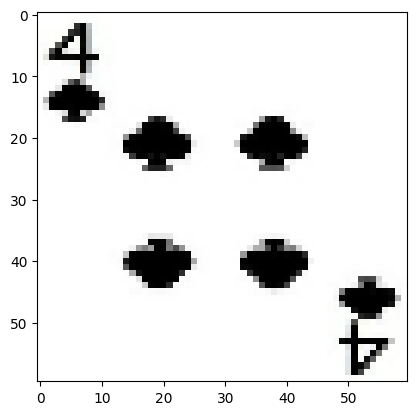

In [10]:
plt.figure()
plt.imshow(first_image.numpy().astype("uint8"))
#plt.colorbar()
plt.grid(False)
plt.show()

**Retrieve the fourth image from the first batch of the training dataset**

In [11]:
for images, labels in train_ds.take(1):
    first_image = images[3]

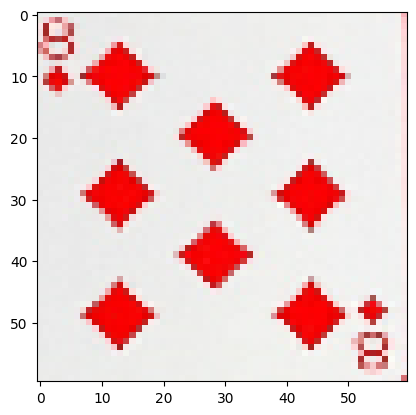

In [12]:
plt.figure()
plt.imshow(first_image.numpy().astype("uint8"))
#plt.colorbar()
plt.grid(False)
plt.show()

**Display a 4x4 grid of images with corresponding class labels from a batch of the training dataset**

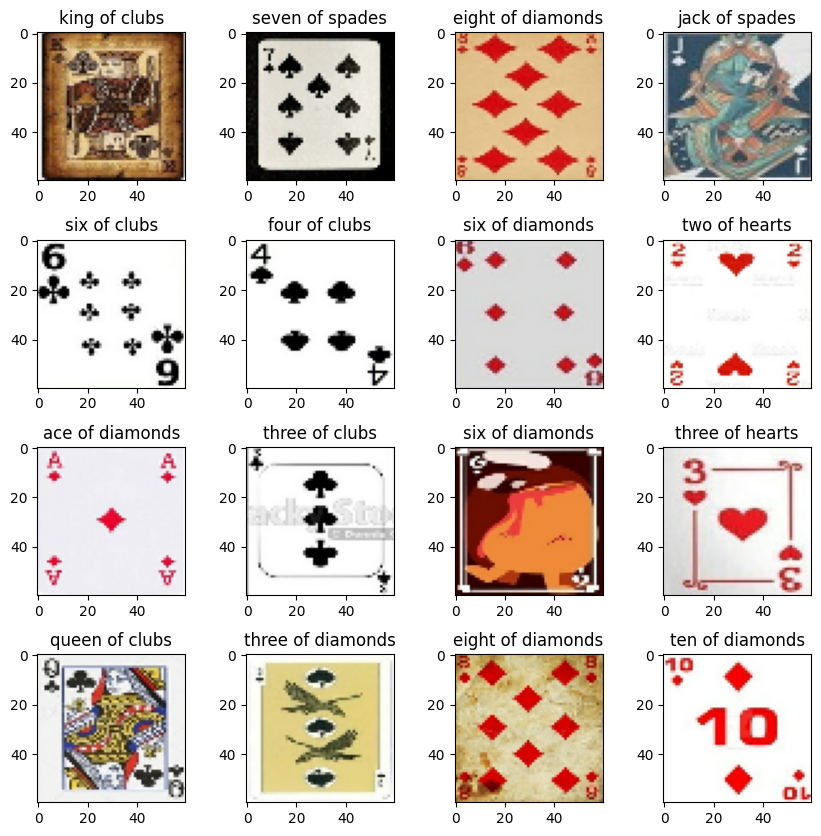

In [13]:
data_iterator = train_ds.as_numpy_iterator()
batch = data_iterator.next()

# Create a 4x4 grid of subplots
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

# Iterate through the images and labels in the batch
for i in range(4):  # Loop for rows
    for j in range(4):  # Loop for columns
        index = i * 4 + j  # Calculate the index for accessing the images and labels

        # Display the image
        ax[i, j].imshow(batch[0][index].astype(int))
        ax[i, j].set_title(label_to_class_name[batch[1][index]])

# Adjust the spacing between subplots to make them look good
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Show the plot
plt.show()

# **Machine Learning**

**Convert a TensorFlow dataset to NumPy arrays of images and labels**

In [14]:
def dataset_to_numpy(dataset):
    images = []
    labels = []
    for image_batch, labels_batch in dataset:
        images.append(image_batch.numpy())
        labels.append(labels_batch.numpy())
    return np.concatenate(images), np.concatenate(labels)

In [15]:
X_train, y_train = dataset_to_numpy(train_ds)
X_test, y_test = dataset_to_numpy(test_ds)
X_valid, y_valid = dataset_to_numpy(valid_ds)

**Flatten multidimesional image arrays into 1D arrays for training, testing, and validation sets**

In [16]:
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))
X_valid_flat = X_valid.reshape((X_valid.shape[0], -1))

In [17]:
models = [ KNeighborsClassifier() , GaussianNB()]

In [18]:
def compare_models_train_test():

  for model in models:

    # Training the model
    model.fit(X_train_flat,y_train)

    # Evaluating the model
    test_data_prediction = model.predict(X_test_flat)

    accuracy = accuracy_score(y_test, test_data_prediction)

    print('Accuracy score of the ', model , ' = ', accuracy)

In [19]:
compare_models_train_test() # Comparing the accuracies of each model


Accuracy score of the  KNeighborsClassifier()  =  0.36981132075471695
Accuracy score of the  GaussianNB()  =  0.23018867924528302


# CNN


**Normalize the pixel values of images in the training and validation datasets**

In [20]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
valid_ds = valid_ds.map(lambda x, y: (normalization_layer(x), y))

**Optimize data loading by caching and prefetching the training and validation datasets**

In [21]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Define a Convolutional Neural Network (CNN) model with two convolutional layers, max pooling, and dense layers**

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(60, 60, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(53, activation='softmax')
])

**Compile the model with Adam optimizer, sparse categorical cross-entropy loss, and accuracy metric**

In [24]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
# Early Stopping and Learning Rate Scheduler
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001)

**Train the model on the training dataset and validate it on the validation dataset for 10 epochs**

In [26]:
history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=10,
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/10
239/239 [==============================] - 52s 194ms/step - loss: 3.3907 - accuracy: 0.1758 - val_loss: 4.4332 - val_accuracy: 0.0491 - lr: 0.0010
Epoch 2/10
239/239 [==============================] - 42s 174ms/step - loss: 2.4599 - accuracy: 0.3423 - val_loss: 2.4940 - val_accuracy: 0.3962 - lr: 0.0010
Epoch 3/10
239/239 [==============================] - 42s 177ms/step - loss: 2.0462 - accuracy: 0.4424 - val_loss: 1.6772 - val_accuracy: 0.5736 - lr: 0.0010
Epoch 4/10
239/239 [==============================] - 45s 186ms/step - loss: 1.7972 - accuracy: 0.5167 - val_loss: 2.0099 - val_accuracy: 0.5736 - lr: 0.0010
Epoch 5/10
239/239 [==============================] - 42s 177ms/step - loss: 1.5974 - accuracy: 0.5640 - val_loss: 1.4952 - val_accuracy: 0.6453 - lr: 0.0010
Epoch 6/10
239/239 [==============================] - 41s 169ms/step - loss: 1.4278 - accuracy: 0.6095 - val_loss: 1.1148 - val_accuracy: 0.6679 - lr: 0.0010
Epoch 7/10
239/239 [==============================] 

**Plot the training and validation loss and accuracy over epochs**

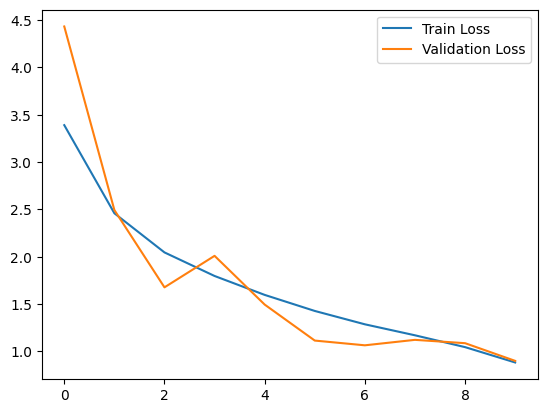

In [27]:
plt.figure()
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

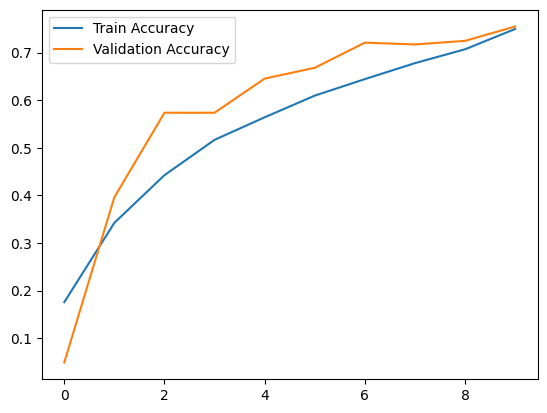

In [28]:
plt.figure()
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()